# Chapter 10 

In [9]:
if(!require('dplyr')){
    install.packages('dplyr')
    library('dplyr')
}
if(!require('datasets')){
    install.packages('datasets')
    library('datasets')
}
if(!require('stats')){
    install.packages('stats')
    library('stats')
}


## Exercise 3

### (a)

In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

In [10]:
#create dataframe of provided observations
df = data.frame(c(1,1,0,5,6,4),c(4,3,4,1,2,0))
#specify col names
colnames(df) = c('X1','X2')
head(df)

,X1,X2
,<dbl>,<dbl>
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2
6,4,0


Plot the observations.

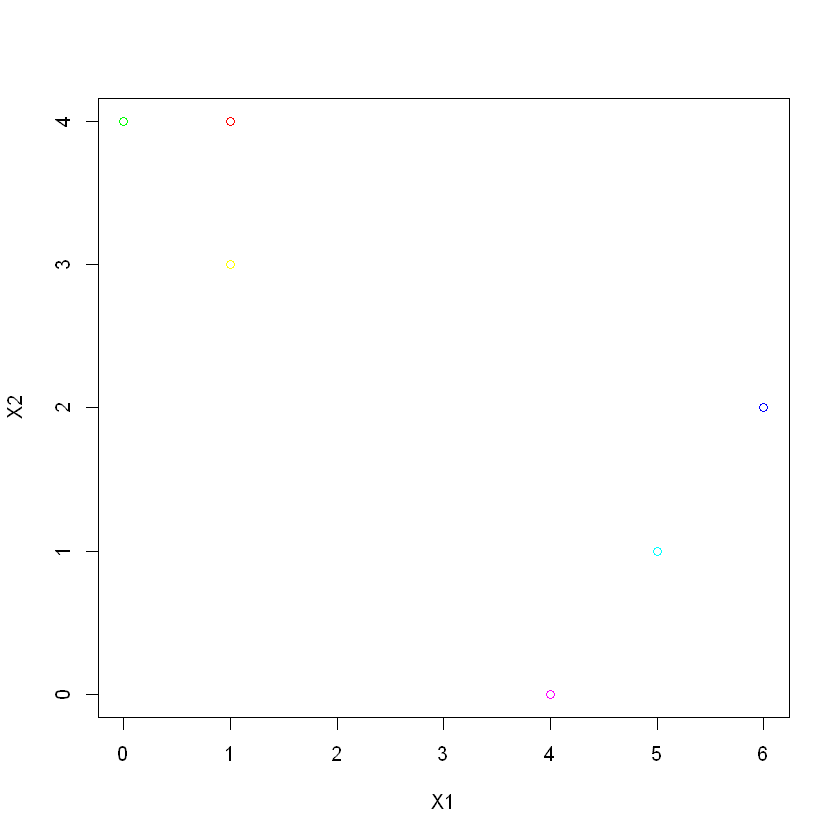

In [11]:
plot(df,col=rainbow(6))

### (b) 

Randomly assign a cluster label to each observation. You can use the `sample()` command in R to do this. Report the cluster labels for each observation.

In [12]:
set.seed(123)
#randomly generate labels with sample function
label=sample(1:6,6)
#append label column to df
df=cbind(df,label)
head(df)

,X1,X2,label
,<dbl>,<dbl>,<int>
1,1,4,3
2,1,3,6
3,0,4,2
4,5,1,4
5,6,2,5
6,4,0,1


### (c)

Compute the centroid for each cluster.

In [13]:
centroids=aggregate(.~label,df,mean)
colnames(centroids)=c('label',paste('Centroid',1:2))

data.frame(df[,-3],centroids[df$label,-1],label=df$label)

,X1,X2,Centroid.1,Centroid.2,label
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,1,4,1,4,3
6,1,3,1,3,6
2,0,4,0,4,2
4,5,1,5,1,4
5,6,2,6,2,5
1,4,0,4,0,1


### (d)

Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [14]:
EuclideanDistance=function(v,z){
  sqrt(sum( (v-z)^2 ))
}

label=apply(df[,c(1,2)],1,
 function(x){
    dist=apply(centroids[df$labels,c(2,3)],1,function(y){ EuclideanDistance(x,y) })
    which.min(dist[dist>0])
  }
 )

#data.frame(df[,-3],centroids[df$labels,-1],old.labels=df$label,new.labels=label)


### (f)

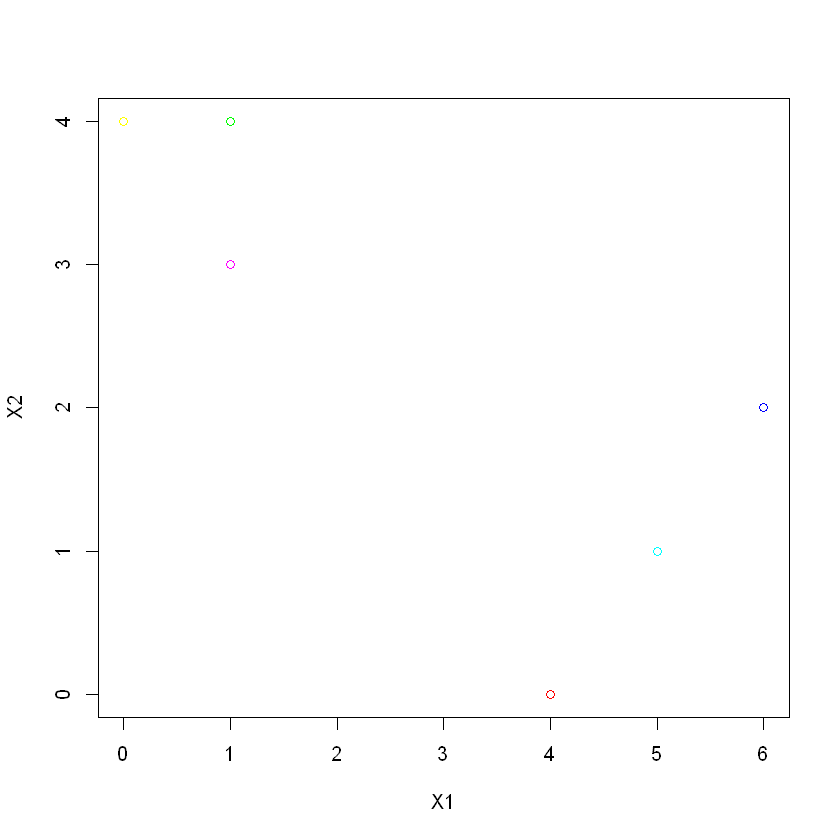

In [15]:
plot(df[,c(1,2)],col=rainbow(6)[df$label])

## Exercise 4

Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two
dendrograms.

### (a)

At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point.
Which fusion will occur higher on the tree, or will they fuse at
the same height, or is there not enough information to tell?

The single-linkage dendrogram will occur lower in the tree.

### (b)

At a certain point on the single linkage dendrogram, the clusters
{5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will
occur higher on the tree, or will they fuse at the same height, or
is there not enough information to tell?

In this instance, there isn't sufficient information to prove when the cluster will and therefore both possibilities can occur. 

## Exercise 8

In Section 10.2.3, a formula for calculating PVE was given in Equa- tion 10.8. We also saw that the PVE can be obtained using the sdev output of the `prcomp()` function.

On the `USArrests` data, calculate PVE in two ways:

### (a)

Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

In [16]:
data('USArrests')

In [17]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [18]:
#feature scaling USArrests

USArrests_scaled = scale(USArrests)
#PCA 
PCA=prcomp(USArrests_scaled)
variance=PCA$sdev^2


variance/sum(variance)

[1] 0.62006039 0.24744129 0.08914080 0.04335752

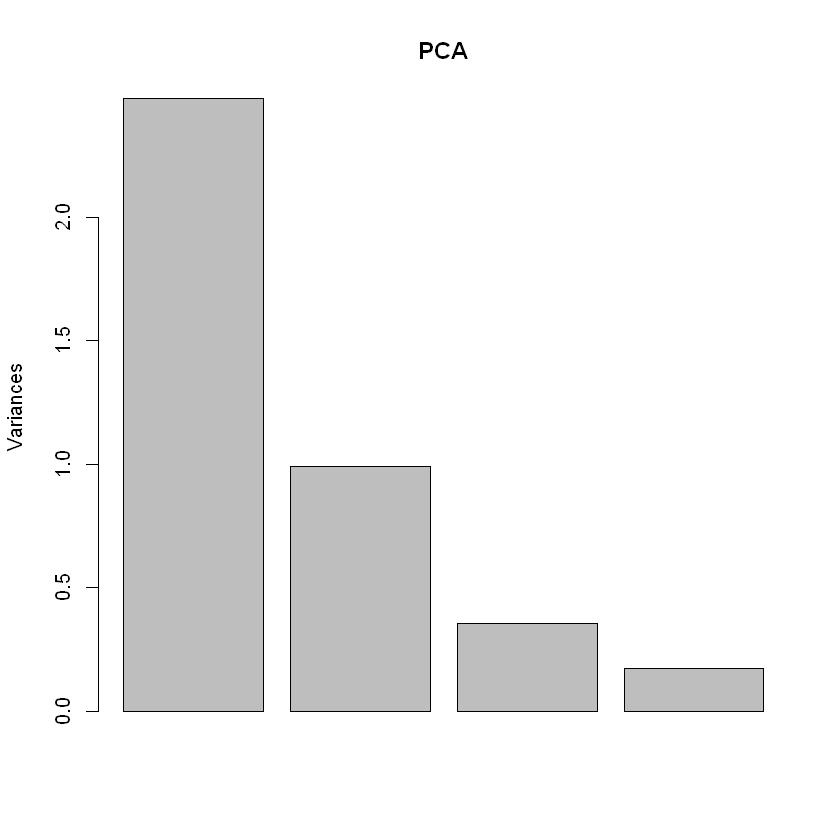

In [19]:
plot(PCA)

### (b)

By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

In [20]:
num=rowSums(apply(USArrests_scaled,1,function(x){ colSums(x %*% PCA$rotation )^2  }))
num

PC1        PC2        PC3        PC4 
121.531837  48.498492  17.471596   8.498074

In [21]:
denom=sum(rowSums(USArrests_scaled^2))
print(denom)
print(num/denom)

[1] 196
       PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752 


## Exercise 9 

Consider the USArrests data. We will now perform hierarchical clus- tering on the states.

### (a)

Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

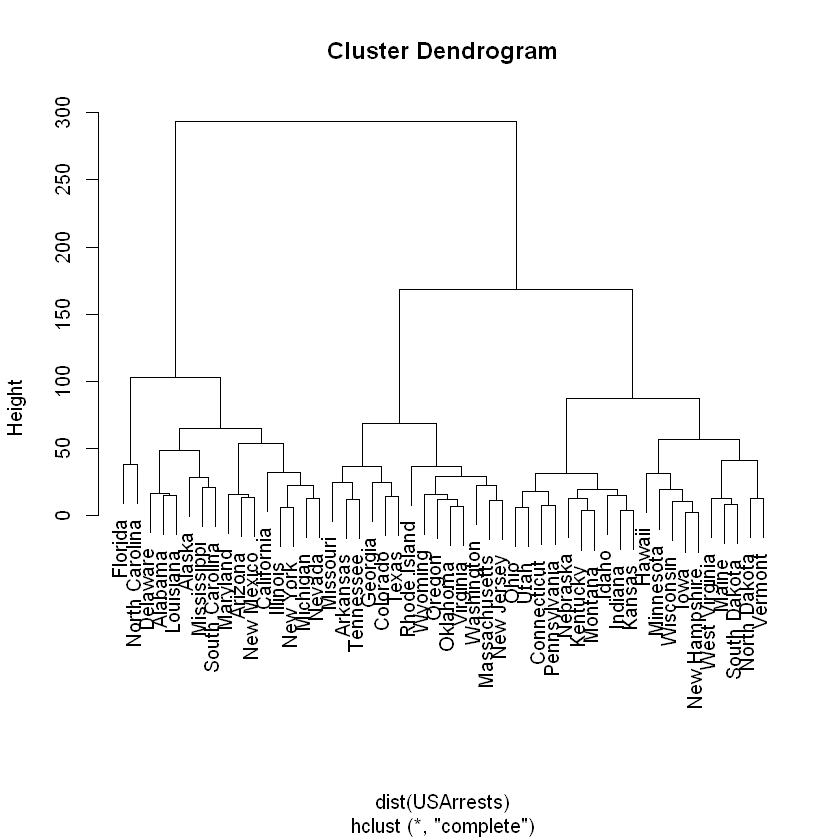

In [22]:
high_clust = hclust(dist(USArrests))

plot(high_clust)

### (b)

Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [23]:
high_clust_pruned = cutree(high_clust,k = 3) #three clusters specified a priori

high_clust_pruned = split(data.frame(names(high_clust_pruned),high_clust_pruned),as.factor(high_clust_pruned))

high_clust_pruned

,names.high_clust_pruned.,high_clust_pruned
,<chr>,<int>
Alabama,Alabama,1
Alaska,Alaska,1
Arizona,Arizona,1
California,California,1
Delaware,Delaware,1
Florida,Florida,1
Illinois,Illinois,1
Louisiana,Louisiana,1
Maryland,Maryland,1


### (c)

 Hierarchically cluster the states using complete linkage and Eu- clidean distance, after scaling the variables to have standard de- viation one.

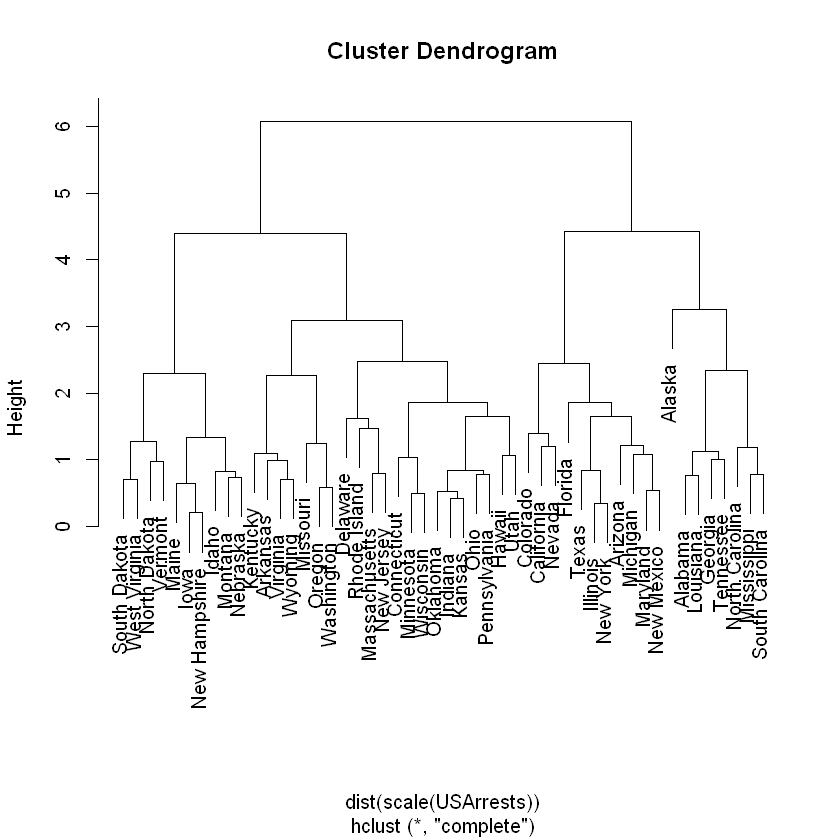

In [24]:
high_clust_scaled = hclust(dist(scale(USArrests)),method='complete')

plot(high_clust_scaled)

### (d)

What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

Scaling the variables results in a very large decrease in height.

In [25]:
high_clust_scaled_pruned = cutree(high_clust_scaled,k = 3)

split(data.frame(names(high_clust_scaled_pruned),high_clust_scaled_pruned),as.factor(high_clust_scaled_pruned))

,names.high_clust_scaled_pruned.,high_clust_scaled_pruned
,<chr>,<int>
Alabama,Alabama,1
Alaska,Alaska,1
Georgia,Georgia,1
Louisiana,Louisiana,1
Mississippi,Mississippi,1
North Carolina,North Carolina,1
South Carolina,South Carolina,1
Tennessee,Tennessee,1
,names.high_clust_scaled_pruned.,high_clust_scaled_pruned


In [26]:
aggregate(USArrests,list(high_clust_scaled_pruned=high_clust_scaled_pruned),mean)

high_clust_scaled_pruned,Murder,Assault,UrbanPop,Rape
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,14.087500,252.7500,53.50000,24.53750
2,11.054545,264.0909,79.09091,32.61818
3,5.003226,116.4839,63.83871,16.33871


## Exercise 10

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

### (a)

Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to
generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations
in each class so that there are three distinct classes

In [39]:
set.seed(123)

for(i in 1:60){
    vector = rnorm(60)
    matrix = cbind(vector,vector) 
}
   

#create three vectors 
feature_mat = matrix(sapply(1:3,function(x){ rnorm(20*50,mean = 10*sqrt(x))}),ncol=50)# 20 obs. in each class with 50 features.

class=unlist(lapply(1:3,function(x){rep(x,20)}))

### (b)

Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors

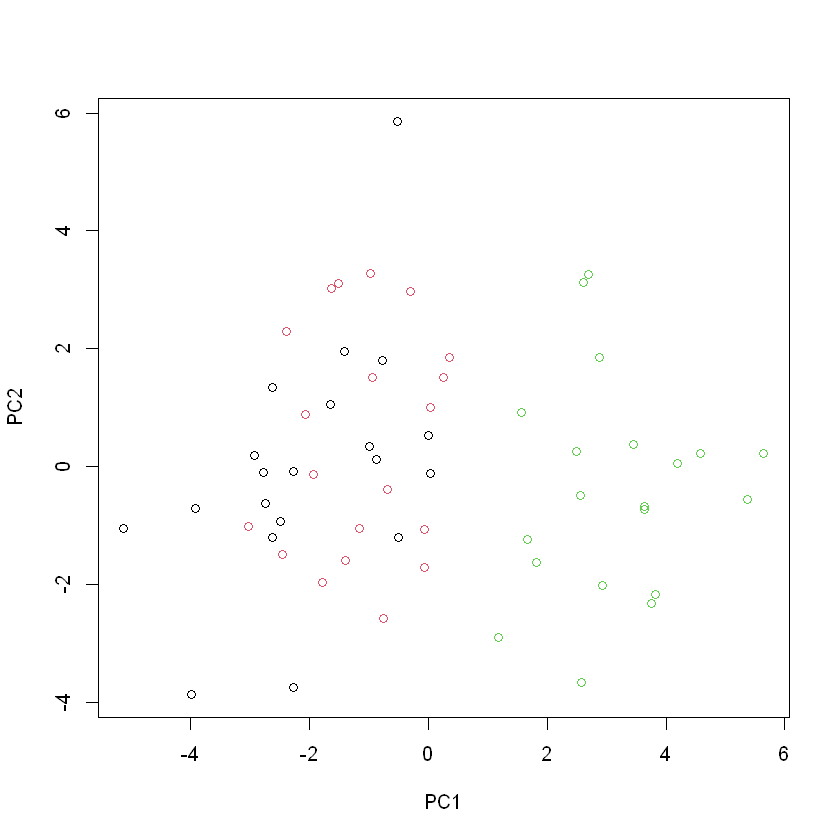

In [41]:
PCA=prcomp(feature_mat)
plot(PCA$x[,c(1,2)],col=class)


### (c)

Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering compare to the true class labels?
Hint: You can use the table() function in R to compare the true
class labels to the class labels obtained by clustering. Be careful
how you interpret the results: K-means clustering will arbitrarily
number the clusters, so you cannot simply check whether the true
class labels and clustering labels are the same.

In [45]:
set.seed(123)

kmeans_model=kmeans(feature_mat,3)

kmeans_model$cluster

[1] 2 1 2 1 2 1 1 2 1 2 2 1 2 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1
[39] 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

### (d)

Perform K-means clustering with K = 2. Describe your results.

In [46]:
set.seed(123)
#2 clusters a priori
kmeans_two_clust = kmeans(feature_mat,2)

table(kmeans_two_clust$cluster)


 1  2 
40 20 

### (e)

Now perform K-means clustering with K = 4, and describe your
results.

In [47]:
set.seed(123)
kmeans_four_clust = kmeans(data,4)

table(kmeans_four_clust$cluster)


 1  2  3  4 
19 16 10 15 

When we define `k = 4` which means the data will be clustered into four clusters, we can see that it is harder to distinguish the clusters. This can be observed by the uniform distribution of obervations within clusters.

### (f)

Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

In [49]:
set.seed(123)

kmeans_three_PSA = kmeans(PCA$x[,c(1,2)],3)

table(kmeans_three_PSA$cluster)


 1  2  3 
21 22 17 

### (g)

Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain

In [50]:
set.seed(123)

kmeans_scaled = kmeans(scale(data,center = T,scale = T),3)

table(kmeans_scaled$cluster)


 1  2  3 
24 18 18 

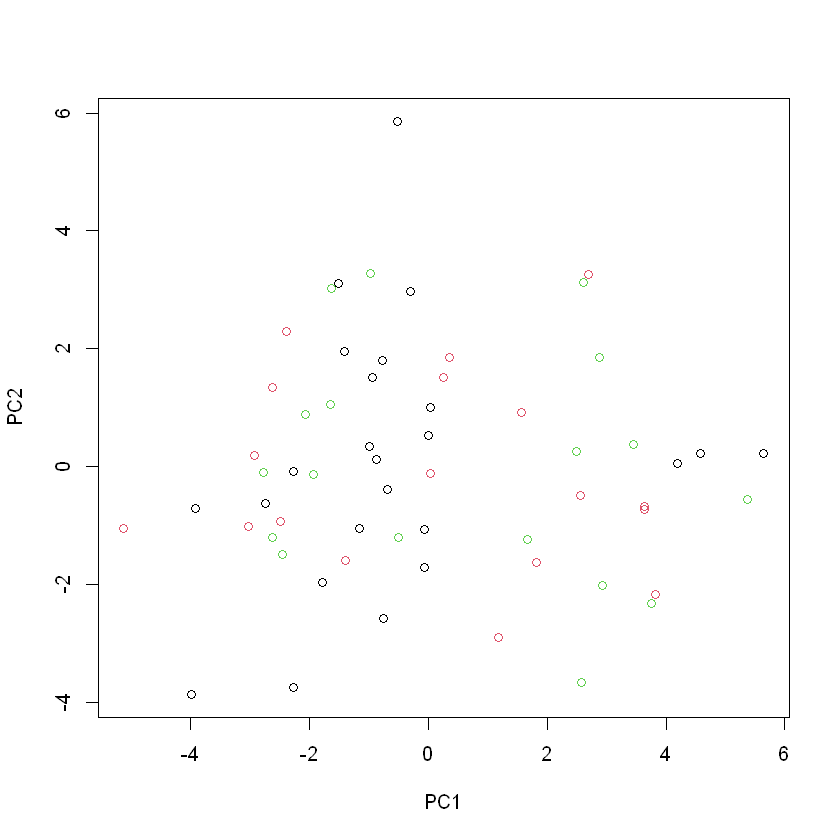

In [51]:
plot(PCA$x[,c(1,2)],col=kmeans_scaled$cluster)